# Simple Harmonic Oscillator

In this chapter, we will discuss how to simulate and visualise a dynamical system. To do this, we will utilise a pre-existing implementation of the simple harmonic oscillator in `hdynamics/dynamics/harmonic_oscillator.py` to discuss how we can simulate and plot dynamical systems in our framework.

## Simple Harmonic Oscillator Hamiltonian

For a mass $m$ attached to a spring with spring constant $k$, and ignoring damping, the Hamiltonian is:

$$
H = \frac{p^2}{2m} + \frac{1}{2} k q^2
$$

The resulting Hamilton's equations are:

$$
\dot{q} = \frac{p}{m}
\dot{p} = -kq 
$$

## Implementing the Hamiltonian

The Hamiltonian is implemented in `hdynamics/dynamics/harmonic_oscillator.py` as follows. In this file we create a class `HarmonicOscillator` that inherits from the abstract class `Dynamics` defined in `hdynamics/dynamics/hdynamics.py`. This class implements the Hamiltonian method `H`, allowing the class to be instantiated and used to simulate the dynamics of the harmonic oscillator.

It also contains the methods `plot_trajectory`, `plot_phase_energy`, and `plot_phase_trajectories` which allow the specific dynamical system of a harmonic oscillator to be visualised.

## Importing The Harmonic Oscillator

First, we can import the `HarmonicOscillator` system defined in the `hdynamics/dynamics/harmonic_oscillator.py` and create a dynamical system object `harmonic_oscillator` as follows:

In [2]:
from hdynamics.dynamics.harmonic_oscillator import HarmonicOscillator

harmonic_oscillator = HarmonicOscillator()

## Create an Initial Condition

We can create an initial condition for the system with an initial position of $1$ and an initial momentum of $0$ as follows:

In [9]:
import jax.numpy as jnp

initial_condition = jnp.array([1.0, 0.0])

print("Initial condition:", initial_condition)

Initial condition: [1. 0.]


## Use JAX Autodiff to Obtain Symplectic Form

Thanks to auto differentiation in JAX, we can obtain the gradient of the Hamiltonian `harmonic_oscillator.H()` using the `jax.grad` function and pass it to the `symplectic_form` defined in `utils.py` (please have a look!).

We can define this behaviour within the function `grad_x` which we can then pass to the ODE solver to solve the system.

In [4]:
import jax

from hdynamics.utils import symplectic_form

jac_h = jax.grad(lambda x: harmonic_oscillator.H(x, eps=0))

def grad_x(x, t):
    """Compute the symplectic gradient of the Hamiltonian at state x and time t.

    Args:
        x: State vector.
        t: Time (unused, included for compatibility with ODE solvers).

    Returns:
        The symplectic gradient at x.
    """
    return symplectic_form(jac_h(x))

## Generate trajectory

Next, we can generate a trajectory by by passing the initial condition and `grad_x` (which calculates the gradient) to the the function `ode_int` from `odeint.py`. This uses the function `jax.experimental.ode.odeint` to integrate the system of equations defined by the Hamiltonian, and solve the equations as a function of time.

In [ ]:
import jax.numpy as jnp

from hdynamics.odeint import ode_int


def generate_trajectory(grad_x, x_start, stepsize=0.04, n_steps=100):
    """Generate a trajectory for a dynamical system using an ODE solver.

    Args:
        grad_x: Function that computes the symplectic gradient of the Hamiltonian.
        x_start: Initial state vector.
        stepsize: Time step size.
        n_steps: Number of steps to simulate.

    Returns:
        solution: Array of system states over time.
        t_span: Array of time points corresponding to the trajectory.
    """
    t_start = 0.0
    t_end = n_steps * stepsize

    t_span = jnp.linspace(t_start, t_end, n_steps + 1)

    solution = ode_int(grad_x, x_start, t_span)

    return solution, t_span

trajectory, t_span = generate_trajectory(grad_x, initial_condition)
print('trajectory:', trajectory.shape)

## Plotting trajectory

Lastly, we can plot the trajectory of the dynamical system by calling the `plot_trajectory()` and `plot_phase_energy` methods of the `HarmonicOscillator` class, which plots the trajectory of the system.

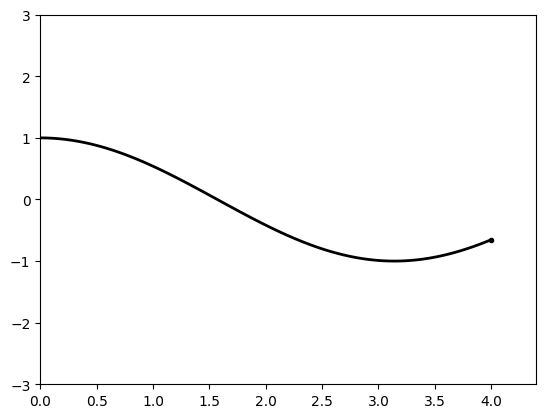

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

harmonic_oscillator.plot_trajectory(trajectory, t_span, ax)

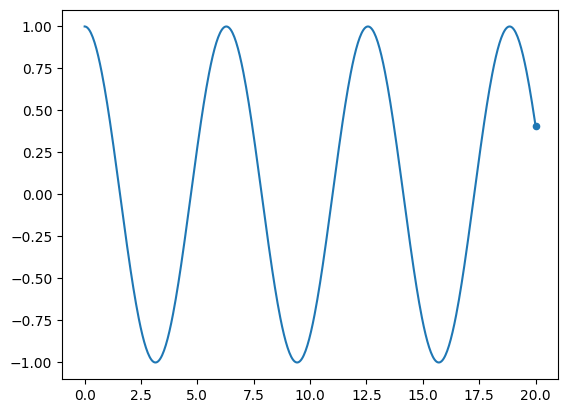

In [ ]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

from hdynamics.dynamics.harmonic_oscillator import HarmonicOscillator


harmonic_oscillator = HarmonicOscillator()

initial_condition = jnp.array([1.0, 0.0])

trajectory, t_span = harmonic_oscillator.generate_trajectory(initial_condition, 0.04)

fig, ax = plt.subplots(1, 1)

harmonic_oscillator.plot_trajectory(trajectory, t_span, ax)


In [ ]:
import matplotlib.pyplot as plt

from hdynamics.dynamics.harmonic_oscillator import HarmonicOscillator

harmonic_oscillator = HarmonicOscillator()

fig, ax = plt.subplots(1, 1)

harmonic_oscillator.plot_phase_energy(ax)

NameError: name 'plt' is not defined